In [11]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os

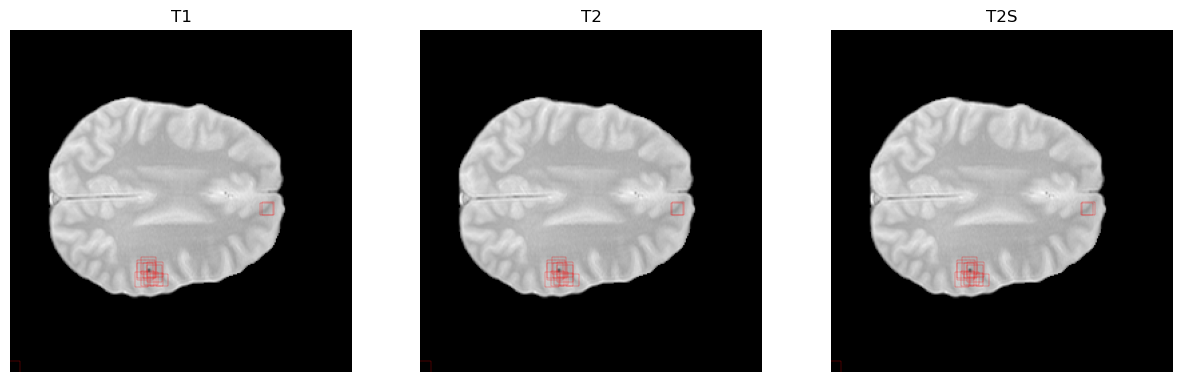

In [12]:
# Load the YOLO output
yolo_output = [
    {"image_id": "6780698_27", "category_id": 1, "bbox": [101.035, 176.25, 5.956, 6.633], "score": 0.74383}, {"image_id": "6780698_27", "category_id": 1, "bbox": [103.848, 177.433, 7.702, 8.781], "score": 0.00065}, {"image_id": "6780698_27", "category_id": 1, "bbox": [94.886, 182.612, 6.217, 6.972], "score": 0.00062}, {"image_id": "6780698_27", "category_id": 1, "bbox": [0.0, 249.445, 5.207, 6.555], "score": 0.00061}, {"image_id": "6780698_27", "category_id": 1, "bbox": [101.518, 182.49, 6.732, 5.895], "score": 0.00061}, {"image_id": "6780698_27", "category_id": 1, "bbox": [96.515, 173.685, 9.281, 9.237], "score": 0.0004}, {"image_id": "6780698_27", "category_id": 1, "bbox": [99.28, 182.187, 5.777, 6.863], "score": 0.00035}, {"image_id": "6780698_27", "category_id": 1, "bbox": [96.261, 176.23, 8.326, 8.512], "score": 0.00027}, {"image_id": "6780698_27", "category_id": 1, "bbox": [99.866, 171.572, 7.003, 8.727], "score": 0.00024}, {"image_id": "6780698_27", "category_id": 1, "bbox": [110.546, 183.846, 5.523, 5.086], "score": 0.00023}, {"image_id": "6780698_27", "category_id": 1, "bbox": [103.841, 175.119, 8.164, 7.441], "score": 0.00022}, {"image_id": "6780698_27", "category_id": 1, "bbox": [190.09, 130.183, 5.112, 5.497], "score": 0.00021}, {"image_id": "6780698_27", "category_id": 1, "bbox": [188.898, 130.65, 5.44, 5.349], "score": 0.00019}, {"image_id": "6780698_27", "category_id": 1, "bbox": [106.227, 183.186, 5.643, 5.907], "score": 0.00015},
]

# Root path of the images
# root_path = '/mnt/storage/ji/brain_mri_valdo_mayo/valdo_resample_ALFA_YOLO_PNG_ESRGAN_T2S_only/images/val'
root_path = "/media/Datacenter_storage/Ji/brain_mri_valdo_mayo/mayo_yolo_t2s_only_rotated/images/test/rotated"


# Function to visualize the image with bounding boxes on separate channels
def visualize_image_with_bboxes(image_id, bboxes):
    image_path = os.path.join(root_path, f"{image_id}.png")
    image = Image.open(image_path)
    image_array = np.array(image)
    
    # Separate the channels
    red_channel = image_array[:, :, 0]
    green_channel = image_array[:, :, 1]
    blue_channel = image_array[:, :, 2]

    # Plot the channels with bounding boxes
    plt.figure(figsize=(15, 5))

    for i, (channel, cmap, title) in enumerate(zip([red_channel, green_channel, blue_channel], ['Reds', 'Greens', 'Blues'], ['T1', 'T2', 'T2S'])):
        plt.subplot(1, 3, i + 1)
        plt.imshow(channel, cmap='gray')
        for bbox in bboxes:
            x, y, width, height = bbox
            # Increase the size of the bounding box
            rect = plt.Rectangle((x - 2, y - 2), width + 4, height + 4, edgecolor='red', facecolor='none', linewidth=0.2)
            plt.gca().add_patch(rect)
        plt.title(title)
        plt.axis('off')

    plt.show()

# Group bounding boxes by image_id
bboxes_by_image = {}
for item in yolo_output:
    image_id = item['image_id']
    bbox = item['bbox']
    if image_id not in bboxes_by_image:
        bboxes_by_image[image_id] = []
    bboxes_by_image[image_id].append(bbox)

# Visualize each image with its bounding boxes on separate channels
for image_id, bboxes in bboxes_by_image.items():
    visualize_image_with_bboxes(image_id, bboxes)

In [13]:
def find_nonempty_text_files(directory):
    """
    Find all non-empty .txt files in a directory
    Returns a list of file names
    """
    nonempty_files = []
    dir_path = Path(directory)
    
    # Find all .txt files
    for txt_file in dir_path.glob("*.txt"):
        # Check if file is not empty
        if txt_file.stat().st_size > 0:
            with open(txt_file, 'r') as f:
                content = f.read().strip()
                if content:  # Check if there's actual content after stripping whitespace
                    nonempty_files.append(txt_file.name)
    
    return sorted(nonempty_files)  # Sort alphabetically

task = "val"
directory = '/mnt/storage/ji/brain_mri_valdo_mayo/valdo_resample_ALFA_YOLO_PNG/labels/val'
# directory = f"{root_path}/labels/{task}"  # Replace with your folder path
nonempty_files = find_nonempty_text_files(directory)

print(f"Found {len(nonempty_files)} non-empty text files:")
for filename in nonempty_files:
    print(f"- {filename}")

Found 0 non-empty text files:
